# Simulation test code

## Simple 1-node network model with Wilson-Cowan type dynamics 

#### Modified from Takuya Ito (taku.ito1@gmail.com)   11/29/2018

See also: 
- https://github.com/sheyma/MSc_Thesis/blob/master/scripts/calcBOLD.py and 
- https://github.com/sheyma/MSc_Thesis/blob/master/thesis/bayrak_MSc14.pdf (pp. 30-32)


(Last update A.L.: 2022-02-05)



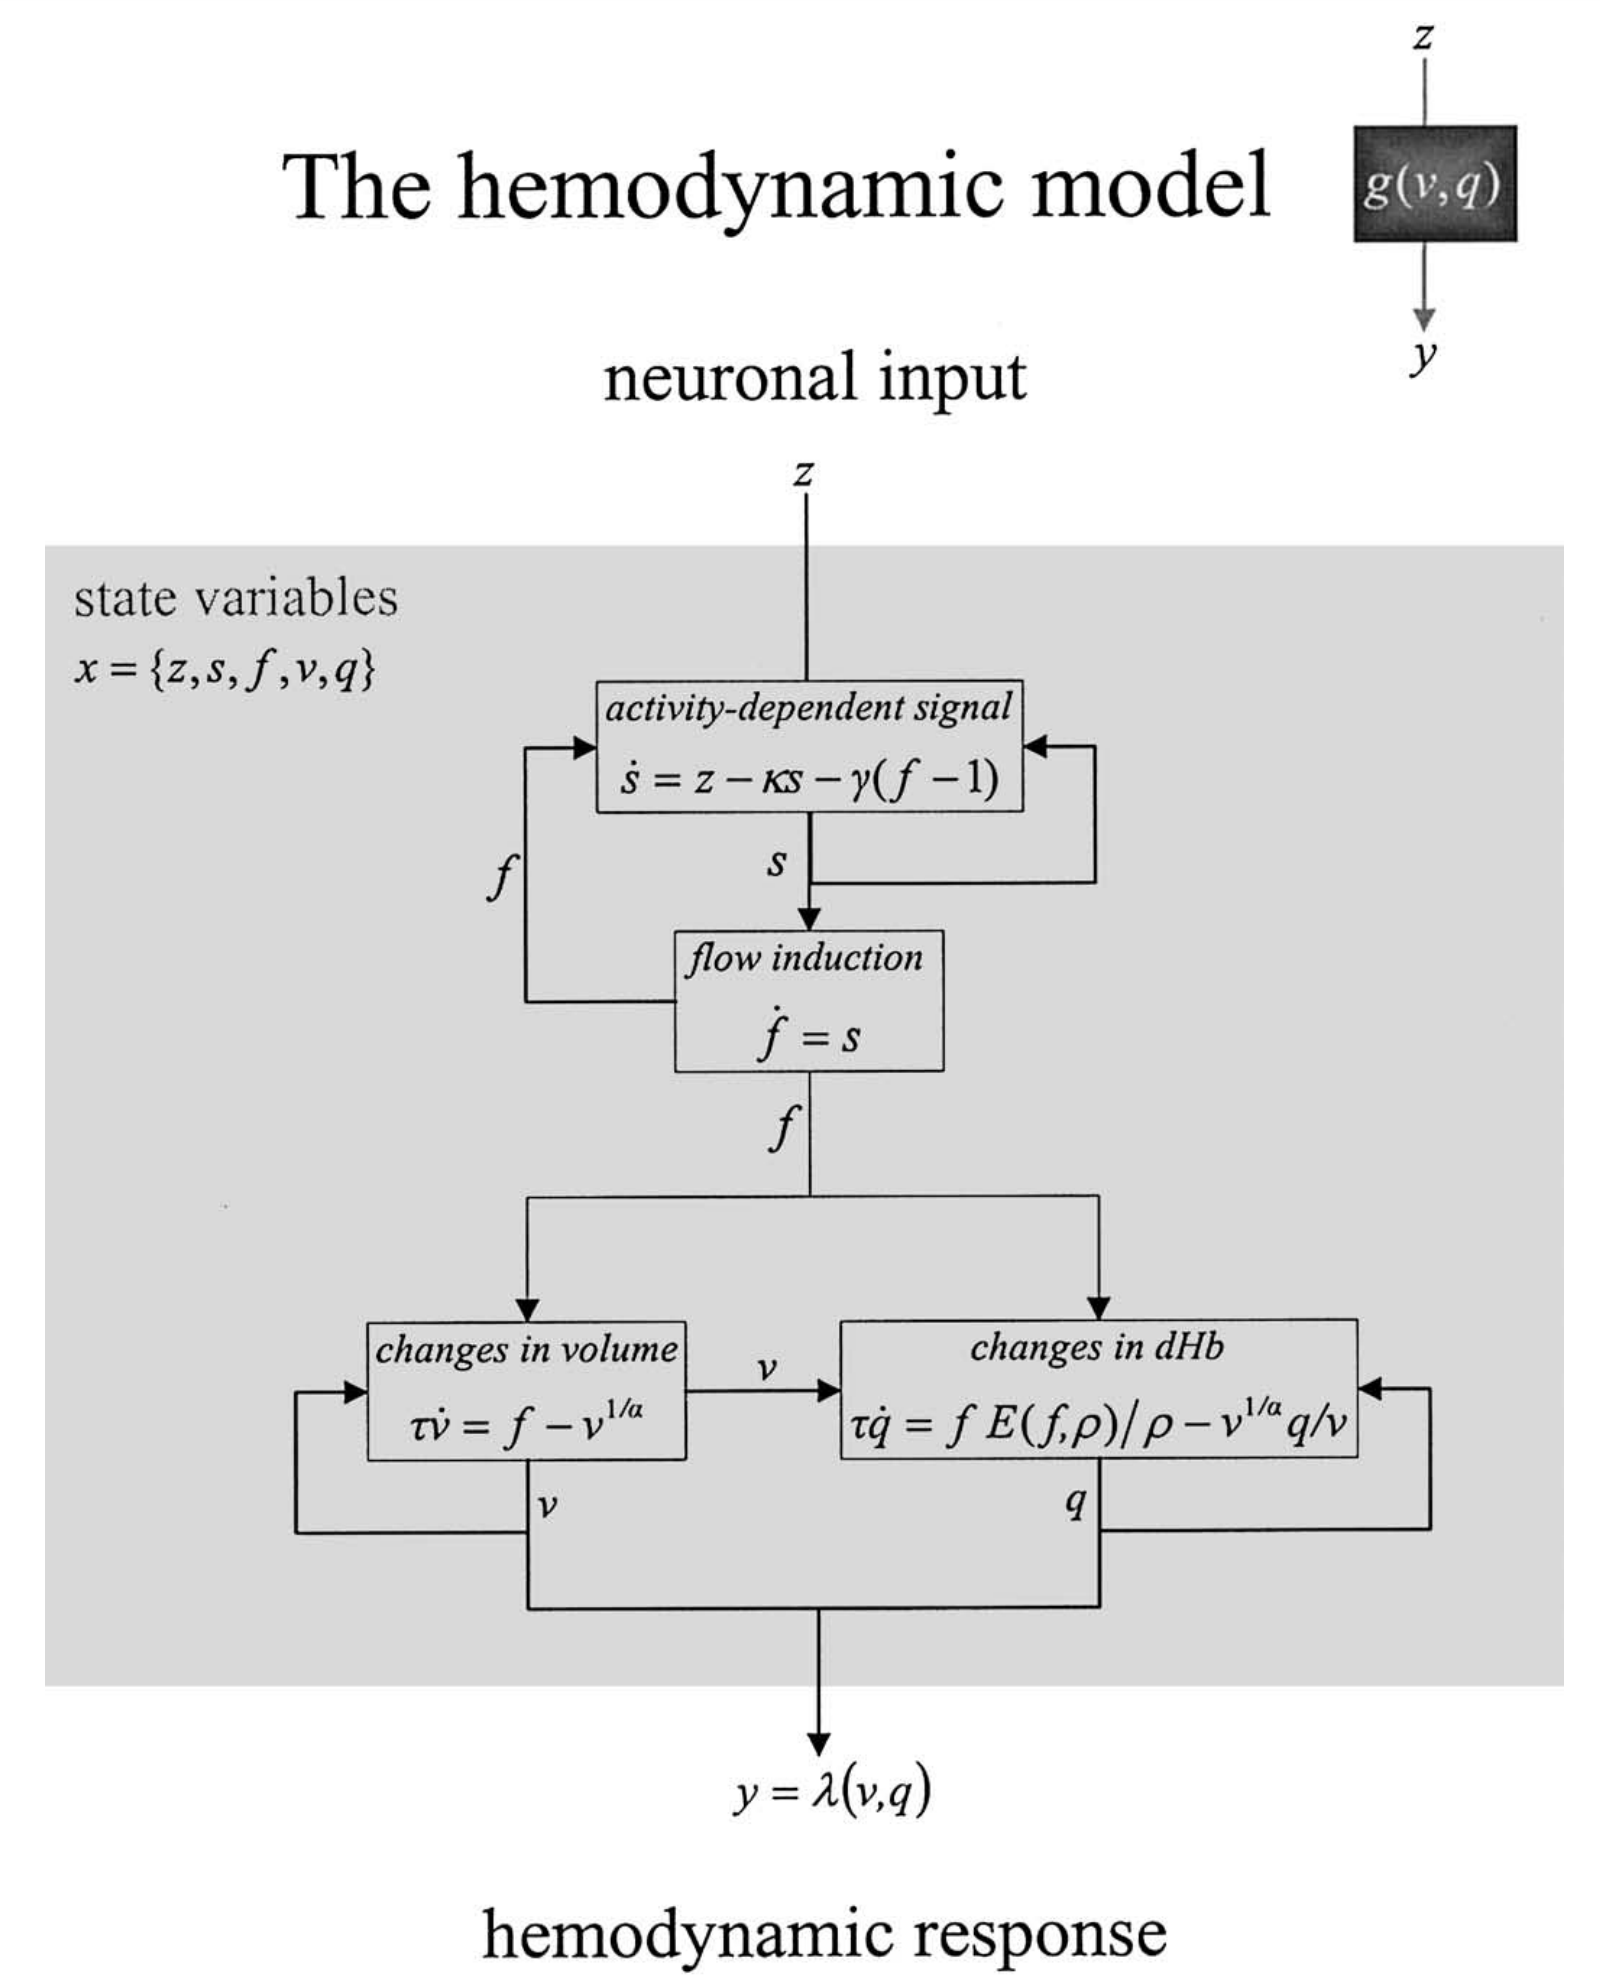

In [11]:
from IPython.display import Image
Image(filename='assets/hemodynamic_model.png', width=800) 

# From https://www.fil.ion.ucl.ac.uk/~karl/Dynamic%20causal%20modelling.pdf (implementation by Takuya Ito)

In brief, for the $i^{th}$ region, neuronal activity $z_i$ causes an increase in a vasodilatory signal $s_i$ that is subject to autoregulatory feedback. 
Inflow $f_i$ responds in proportion to this signal with concomitant changes in blood volume $v_i$ and deoxyhemoglobin content $q_i$

$$
\begin{equation} \label{eq1}
\begin{split}
\frac{ds_i}{dt} & = z_i - \kappa_i s_i - \gamma_i (f_i -1)\\
\frac{df_i}{dt} & = s_i \\
\tau_i \frac{dv_i}{dt} & = f_i - {v_i}^{1/\alpha} \\
\tau_i \frac{dq_i}{dt} & = f_i E(f_i, \rho_i)/{\rho_i} - {v_i}^{1/\alpha} q_i/v_i
\end{split}
\end{equation}
$$

Outflow is related to volume $f_{\text{out}}(v) = v^{1/\alpha}$ through Grubb's exponent $\alpha$. The oxygen extraction is a function of flow $E(f, \rho) = 1 - (1 - \rho)^{1/f}$ where $\rho$ is resting oxygen extraction fraction.

The BOLD signal is taken to be a static nonlinear function of volume and deoxyhemoglobin that comprises a volume-weighted sum of extra- and intravascular signals:

$$
\begin{equation} \label{eq2}
\begin{split}
y_i & = g(q_i, v_i) \\
    & = V_0(k_1/1 - q_i) + k_2(1 - q_i/v_i) + k_3(1 - v_i)) \\
k_1 & = 7 \rho_i \\
k_2 & = 2 \\
k_3 & = 2 \rho_i - 0.2
\end{split}
\end{equation}
$$

where $V_0=0.002$ is resting blood volume frction.

## Balloon-Windkessel Model for BOLD Activity Simulation

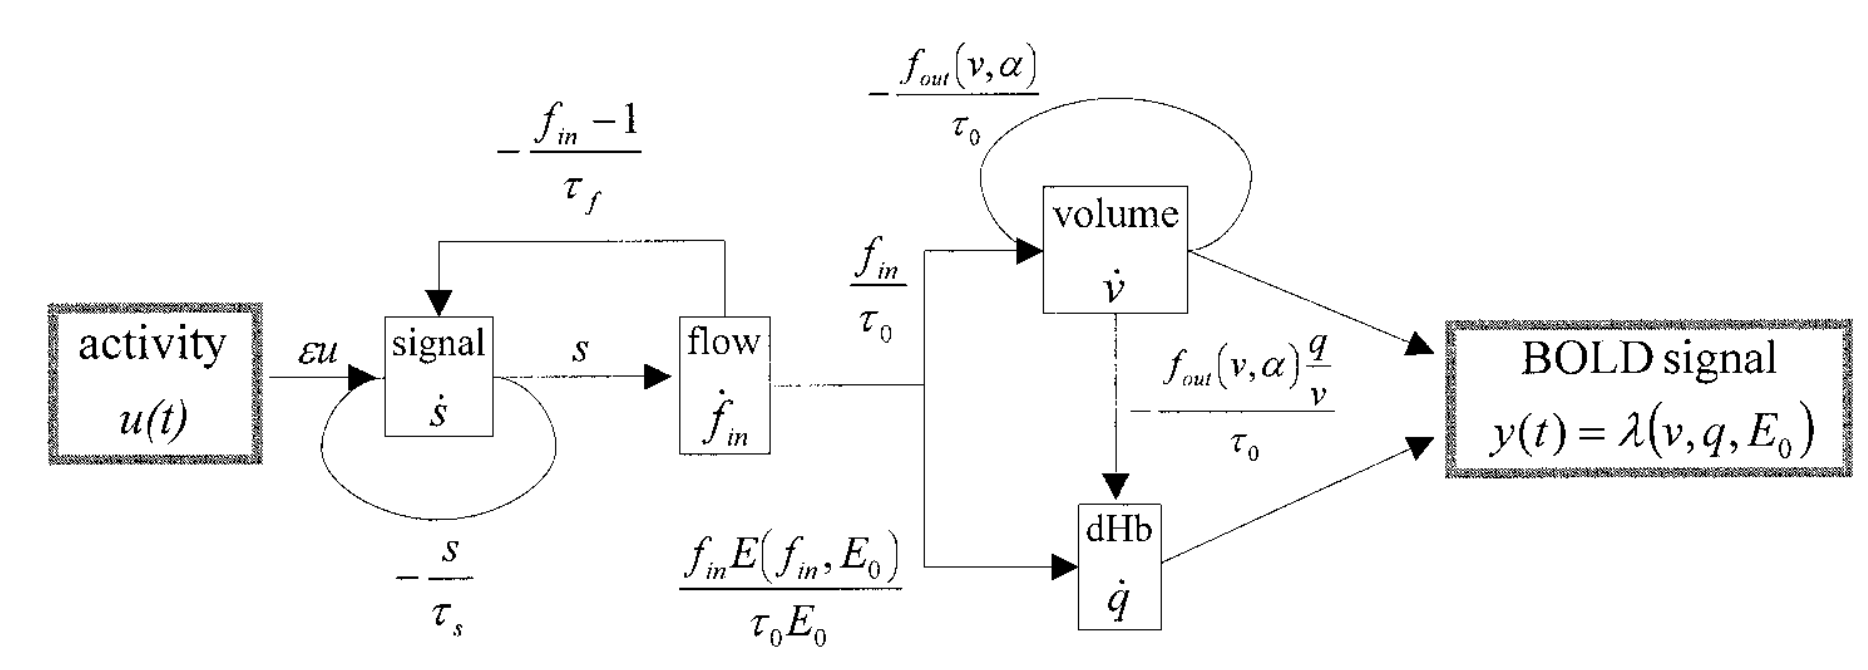

In [12]:
from IPython.display import Image
Image(filename='assets/hemodynamic_model_2.png', width=800) 

From [6]: https://www.fil.ion.ucl.ac.uk/~karl/Nonlinear%20Responses%20in%20fMRI%20The%20Balloon%20Model.pdf 

Schematic illustrating the organization of the hemodynamic model. This is a fully nonlinear single input 
$u(t)$, single output $y(t)$ state model with four state variables $s$, $f_{in}$, $v$, and $q$.

[_Seyma Bayrak_](https://www.researchgate.net/scientific-contributions/Seyma-Bayrak-2116264445) Simulation of Brain Functional and Structural Connectivity on Empirical and Randomized Complex Networks. Master's Thesis. Department of Integrative Neuroscience, Otto-von-Guericke-Universitat Magdeburg, December 2014 [[PDF](https://github.com/sheyma/MSc_Thesis/blob/master/thesis/bayrak_MSc14.pdf)]


Blood oxygen level dependent (BOLD) contrast imaging is one of the underlying mechanisms of fMRI to map brain activity at resting state. A BOLD signal is thought to arise from interactions between neuronal activity and regional changes in the surrounding of those active neurons such as blood volume, blood flow and  oxygen level in capillaries. When neuronal activity increases, the blood flow in blood vessels surrounding this neuronal region rises, causing a change in relative amounts of deoxygenated and oxygenated forms of Hemoglobin (dHB and Hb). The difference in magnetic properties of dHb (paramagnetic) and Hb (diamagnetic) is the key ingredient to the observed changes in the magnetic resonance signal. A better understanding of the resting-state BOLD signal is required to better interpret neuronal activity. The previous section already proposed  a model for the neuronal activity, the FitzHugh-Nagumo ([FHN](https://en.wikipedia.org/wiki/FitzHugh%E2%80%93Nagumo_model)) model. This section will introduce a hemodynamic process to capture BOLD activity with a mathematical model known as the Balloon-Windkessel model (Buxton, Wong, Frank, MRM 1998)[42]. 

In addition to the variations in magnetic properties of the blood caused by blood flow in vessels, there are other physiological changes during alteration in neuronal activity that affect the temporal dynamics of BOLD signal, i.e. cerebral blood flow (CBF), cerebral blood volume (CBV) and cerebral metabolic rate of oxygen consumption (CMRO_2). Moreover, the BOLD response is subject dependent: the physiological baseline state of the individual under examination is used to scale its BOLD response, which makes it difficult to interpret the BOLD signal when the baseline state varies [43]. Moreover, the sensitivity of a BOLD signal to variations in vascular and metabolic physiology complicates an accurate interpretation. The biophysical descriptions of the BOLD signal are still not fully satisfactory for the resting state. 

Changes in the BOLD signal obtained in an fMRI experiment represent an indirect measure of underlying neuronal activity (Vukasonvic and Hövel, Neuroimage 2014) [7]. The modeled neuronal activity can be used to infer the BOLD signal observed in the fMRI data via the Baloon-Windkessel hemodynamic process, which mediates between a non-linear timeseries and all the measured BOLD response (Friston, Michelli, Turner, Price, Neuroimage 2000) [[6](https://pubmed.ncbi.nlm.nih.gov/10988040)]. In short, the Balloon-Windkessel model picks an input signal from neuronal activity timeseries and generates the BOLD activity timeseries as a function of changes in CBF, CBV, CMR$O_2$. The main input of the Baloon-Windkessel model is a neuronal signal in the form of either a spiking rate or a local field potential (Seth et al. Neuroimage 2013) [44]. The neuronal signal in this project will be the normalized FHN time-series of an activator variable, which describes the excitatory membrane potential dynamics of a neuronal population.       

The study of Friston et al. shows that it is possible to capture ultra-slow frequency oscillations ($ <0.1 $ Hz) in the hemodynamic process, given a higher frequency neuronal input for event related responses  [6]. Here, the same model will be tested for the resting-state activity to find out whether it is possible to extract BOLD activity from FHN-modeled $N=90$ AAL brain nodes. Each brain graph obtained from FCM and ACM data sets will be embedded into the Balloon-Windkessel model, and a parameter analysis will be carried out while comparing resultant BOLD simulations to the fMRI-BOLD empirical data set.

  
### Hemodynamic Model

This section is designed to review the Ballon-Windkessel hemodynamic model introduced in Friston et al [6].  

| Abbreviation | Description | 
| :-: | :-: | 
| $u(t)$ | nonlinear input signal (neuronal activity) |
| $s$ | blood-flow inducing signal |
| $\tau_s$ | time constant of $s$  |
| $f_{in}$ | CBF (inflow)  |
| $\tau_f$ | feedback time constant |
| $v$ | normalized venous volume, CBV |
| $\tau_0$ | mean transit time of $v$ |
| $\alpha$ | stiffness  Grubb's exponent |
| $f_{out}(v, \alpha)$ | CBF (outflow) |
| $E_0$ | resting net $O_2$ extraction rate |
| $E(f_{in}, E_0)$ | fraction of $O_2$ extracted from $f_{in}$  |
| $q$ | normalized total dHB content in voxel  |
| $y(t)$ | output BOLD signal |


The following set of equations describe the Balloon-Windkessel model;

$$
\begin{split}
\begin{align} \dot{s} & = \epsilon u(t)- \frac{s}{\tau_s} - \frac{f_{in} -1 }{\tau_f}  \label{eqn: frobenius 19}\\ \dot{f_{in}} & = s
\label{eqn: frobenius 20} \\ \dot{v} & = \frac{f_{in}}{\tau_0} - \frac{f_{out}(v, \alpha)}{\tau_0} 
\label{eqn: frobenius 21} \\ \dot{q} & = \frac{f_{in} E(f_{in}, E_0)}{\tau_0 E_0}- \frac{f_{out}(v, \alpha)}{\tau_0}  \frac{q}{v}  
\
\end{align} 
\end{split}
$$

with the functions:
$$
\begin{split}
\begin{align} f_{out}(v, \alpha) & = v^{1/ \alpha}
\label{eqn: frobenius 22}\\  E(f_{in} , E_0) & = 1- (1-E_0)^{1/f_{in}} . \
\end{align}
\end{split}
$$

Finally, the output BOLD signal is modeled as a function depending on variables $v$, $q$ and parameter $E_0$, 

$$
y(t)= \lambda (v,q,E_0) = V_0 \Big[ k_1(1-q) + k_2 \left( 1- \frac{q}{v} \right) + k_3(1-v)  \Big],
$$
where $k_1 = 7E_0$, $k_2 = 2$, $k_3 = 2E_0 - 0.2$, and $V_0$ is the resting blood volume fraction. The set of differential equations for ${\dot{s}, \dot{f_{in}}, \dot{v}, \dot{q}}$ is numerically integrated using Euler's method with step size $dt=10^{-3}$. The six unknown parameters $\epsilon$, $\alpha$, $\tau_0$, $\tau_f$, $\tau_s$ and $E_0$ are picked up from standard ranges given in Friston et al [6]. 

The CBF is denoted by two symbols based on its flow direction: $f_{in}$ and $f_{out}$, venous blood inflow and outflow, respectively. The nonlinear neuronal activity $u(t)$ and $f_{in}$ are thought to trigger the blood flow inducing signal $s$. Equation (2.15a) above represents time-dependent change of  $s$ depending on $u(t)$, $f_{in}$ and $s$. The three system parameters $\epsilon$, $\tau_s$ and $\tau_f$ are described as following: an efficacy parameter for $u(t)$ to raise $s$, a time constant for decay of $s$, and another time constant for autoregulatory feedback from CBF, respectively [44], [45].

Hemodynamics in the brain assumes that alterations in regional CBF are shaped by an underlying neuronal activity. Equation (2.15b) above presents the rate of change of $f_{in}$ with a linear transformation of $s$, which can originate from a nonlinear neuronal activity model [47], [48]. 

The alteration in cerebral blood volume $v$ is formulated by subtracting $f_{out}$ from $f_{in}$, both rated physiologically with a time constant $\tau_0$, which is also referred to as _mean transit time_ [49]. The Windkessel model contributes to the brain hemodynamics while modeling CBF through CBV:  equation (2.16a) describes a function for $f_{out}$ depending on $v$ and a parameter $\alpha$ (the  _stiffness exponent_) [49].    

The change in magnetic properties of blood is expressed with the difference between dHb uptake and release. The dHb uptake is proportional to the blood inflow $f_{in}$ to the venous compartment and available oxygen to be coupled to Hb. The amount of oxygen carried with blood inflow is estimated with a function $E(f_{in}, E_0)$ divided by resting net oxygen extraction rate $E_0$ as given in equation (2.16b) [42]. The dHb release is proportional to the blood outflow $f_{out}$ and the concentration of dHb in corresponding voxel volume $v$.     


### Takuya Ito implementation of Friston KJ et al. Dynamic causal modelling. Neuroimage 2003;19:1273-1302.

```
def balloonWindkessel(z, sampling_rate, alpha=0.32, kappa=0.65, gamma=0.41, tau=0.98, rho=0.34, V0=0.02):
    """
    Computes the Balloon-Windkessel transformed BOLD signal
    Numerical method (for integration): Runge-Kutta 2nd order method (RK2)

    z:          Measure of neuronal activity (space x time 2d array, or 1d time array)
    sampling_rate: sampling rate, or time step (in seconds)
    alpha:      Grubb's exponent
    kappa:      Rate of signal decay (in seconds)
    gamma:      Rate of flow-dependent estimation (in seconds)
    tau:        Hemodynamic transit time (in seconds)
    rho:        Resting oxygen extraction fraction
    V0:         resting blood vlume fraction

    RETURNS:
    BOLD:       The transformed BOLD signal (from neural/synaptic activity)
    s:          Vasodilatory signal
    f:          blood inflow
    v:          blood volume
    q:          deoxyhemoglobin content
    """
```

In [13]:
import numpy as np
import BalloonWindkessel as bw
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('white')

# 1.0 Define functions

Firing rate equation for a single node

$$\tau_1 \frac{dx_1}{dt} = -x_1 + f\Big( w_{11} x_1 + b_1 + s_1 \Big) \qquad \qquad (1)$$


Where $f(x)$ refers to the nonlinear transfer function, $\tau_i$ refers to the time constant of neuron $i$, and $s_i$ is the gain on neuron $i$.


In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def runSim1D(w11,d,b,s,t,xinit1,tau,dt=.1,function='sigmoid'):
    I1 = np.zeros((t,))
    # Set initial conditions
    I1[0] = xinit1
    
    for i in range(1,t):
        i1k1 = -I1[i-1] + sigmoid(w11*I1[i-1]+b+d[i-1]+s[i-1]) 
        i1k1 = i1k1/tau
        
        i1a = I1[i-1] + i1k1*dt
        
        i1k2 = -i1a + sigmoid(w11*i1a+b+d[i]+s[i])
        i1k2 = i1k2/tau
        
        I1[i] = I1[i-1] + dt*((i1k1+i1k2)/2)
        
    return I1[25:]

def findFP(w11,b,s,t,xinit1,tau,dt=.1):
    """
    Finds the fixed point of the model for a particular parameter regime
    """
    I1 = np.zeros((t,))
    # Set initial conditions
    I1[0] = xinit1
    
    for i in range(1,t):
        i1k1 = -I1[i-1] + sigmoid(w11*I1[i-1]+b+s) 
        i1k1 = i1k1/tau
        
        i1a = I1[i-1] + i1k1*dt
        
        i1k2 = -i1a + sigmoid(w11*i1a+b+s)
        i1k2 = i1k2/tau
        
        I1[i] = I1[i-1] + dt*((i1k1+i1k2)/2)
        
        if I1[i] == I1[i-1] == I1[i-2]: 
            I1fp = I1[i] 
            break        
        
    return I1fp

# 2.0 Run simulations

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


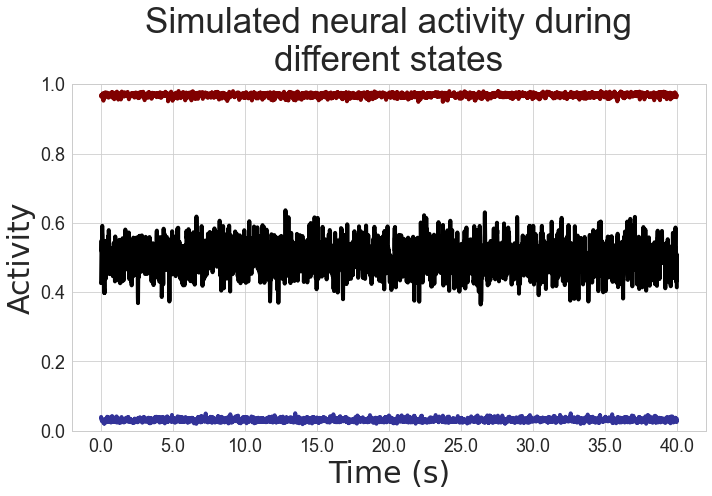

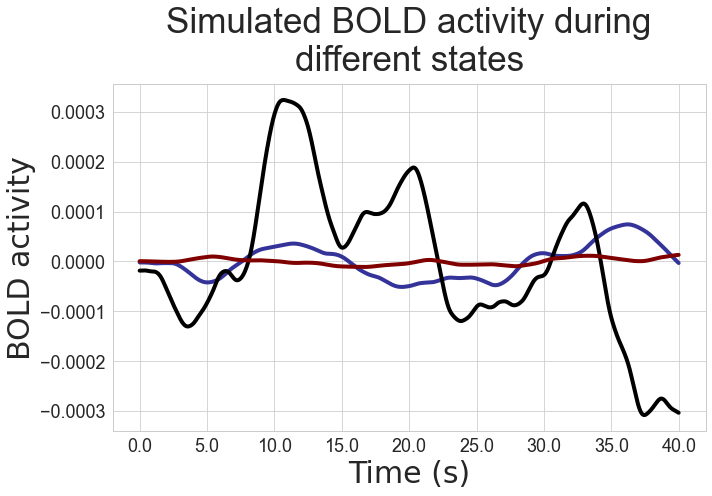

In [15]:
##### Set connectivity weights
w11 = 1
b = -.5

# Set time constant
tau = .1

# Set n timepoints
t = 4025

stimrange = [-3,0,3]
I1fp = []
I1 = []
sd_vals = []
for s in stimrange:
    d = np.random.normal(0,0.25,(t,))
    s1vec = np.ones((t,))*s

    # Calculate fixed points
    xinit1 = 0
    I1fp.append(findFP(w11,b,s,10000,xinit1,tau))

    # Set initial conditions
    xinit1 = I1fp[-1]

    #####
    ## Run simulations
    I1.append(runSim1D(w11,d,b,s1vec,t,xinit1,tau))
    # Calculate SD
    sd_vals.append(np.std(I1[-1]))


#####
sns.set_style('whitegrid')
# Generate plots
plt.figure(figsize=(10,7))
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
# Plot
plt.plot(range(len(I1[0])),I1[0],label='Evoked de-activation | Var = ' + str(round(sd_vals[0],7)),color='#333399',linewidth=4)
plt.plot(range(len(I1[1])),I1[1],label='Baseline activity | Var = ' + str(round(sd_vals[1],7)),color='k',linewidth=4)
plt.plot(range(len(I1[2])),I1[2],label='Evoked activation | Var = ' + str(round(sd_vals[2],7)),color='#800000',linewidth=4)
plt.xlabel('Time (s)',fontsize=30, fontname='FreeSans')
plt.ylabel('Activity',fontsize=30, fontname='FreeSans')
plt.title('Simulated neural activity during\ndifferent states', fontsize=35,y=1.02)
plt.xticks(np.arange(0,len(I1[0])+500,500),np.arange(0,len(I1[0])+500,500)*.01)
plt.ylim([0,1])
#plt.legend(loc=1,bbox_to_anchor=(1.0,0.97), prop={'size': 24})
plt.tight_layout()
plt.savefig('Simulation_NeuralTimeseries.pdf')

# Generate BOLD plots
BOLD = []
z = np.vstack((I1[0],I1[1],I1[2]))
BOLD = bw.balloonWindkessel(z,sampling_rate=0.01)[0]
plt.figure(figsize=(10,7))
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
# Plot
plt.plot(range(len(BOLD[0,:])),BOLD[0,:]-np.mean(BOLD[0,:]),
         label='Evoked de-activation',color='#333399',linewidth=4)
plt.plot(range(len(BOLD[1,:])),BOLD[1,:]-np.mean(BOLD[1,:]),
         label='Baseline activity',color='k',linewidth=4)
plt.plot(range(len(BOLD[2,:])),BOLD[2,:]-np.mean(BOLD[2,:]),
         label='Evoked activation',color='#800000',linewidth=4)
plt.xlabel('Time (s)',fontsize=30, fontname='FreeSans')
plt.ylabel('BOLD activity',fontsize=30, fontname='FreeSans')
plt.title('Simulated BOLD activity during\ndifferent states', fontsize=35,y=1.02)
plt.xticks(np.arange(0,len(I1[0])+500,500),np.arange(0,len(I1[0])+500,500)*.01)
# plt.legend(loc=1,bbox_to_anchor=(1.1,0.97), prop={'size': 24})
plt.tight_layout()
# plt.savefig('Simulation_BOLDTimeseries.pdf')
plt.show()


## Plot physiological signals for each state

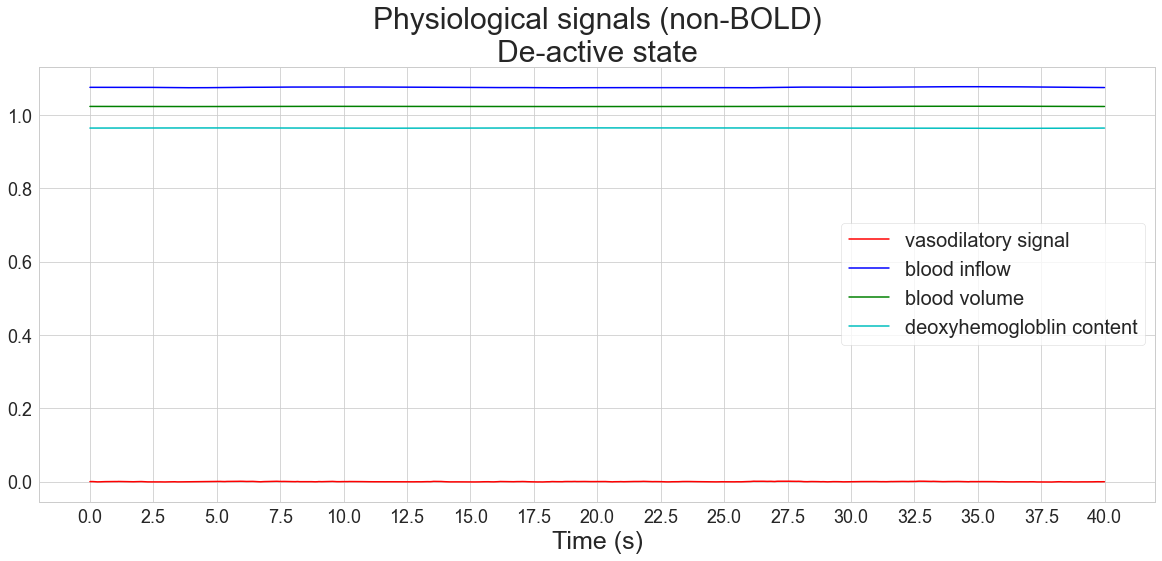

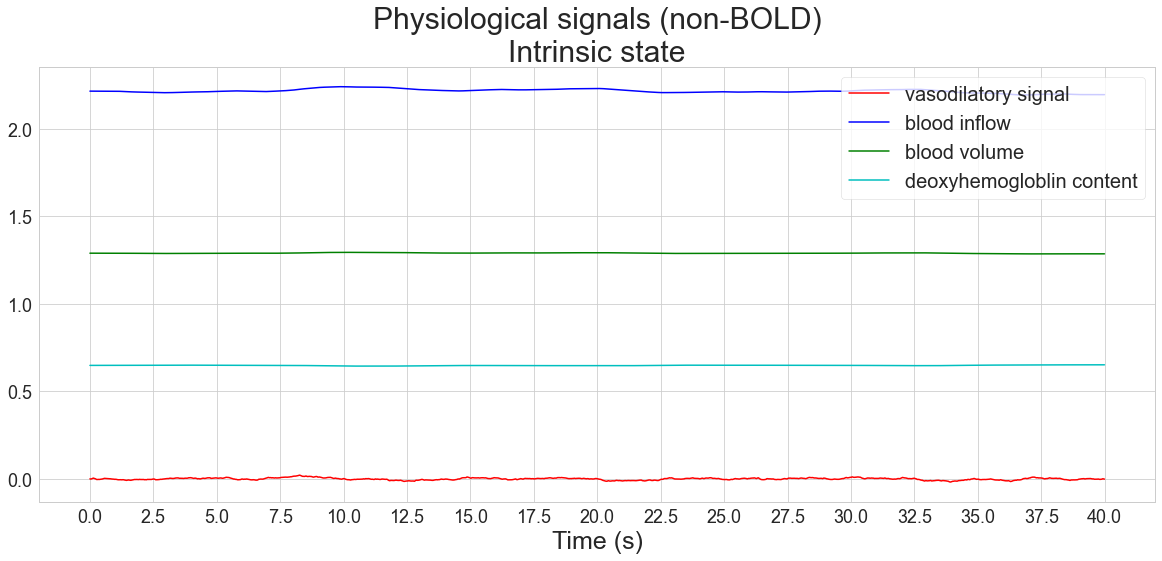

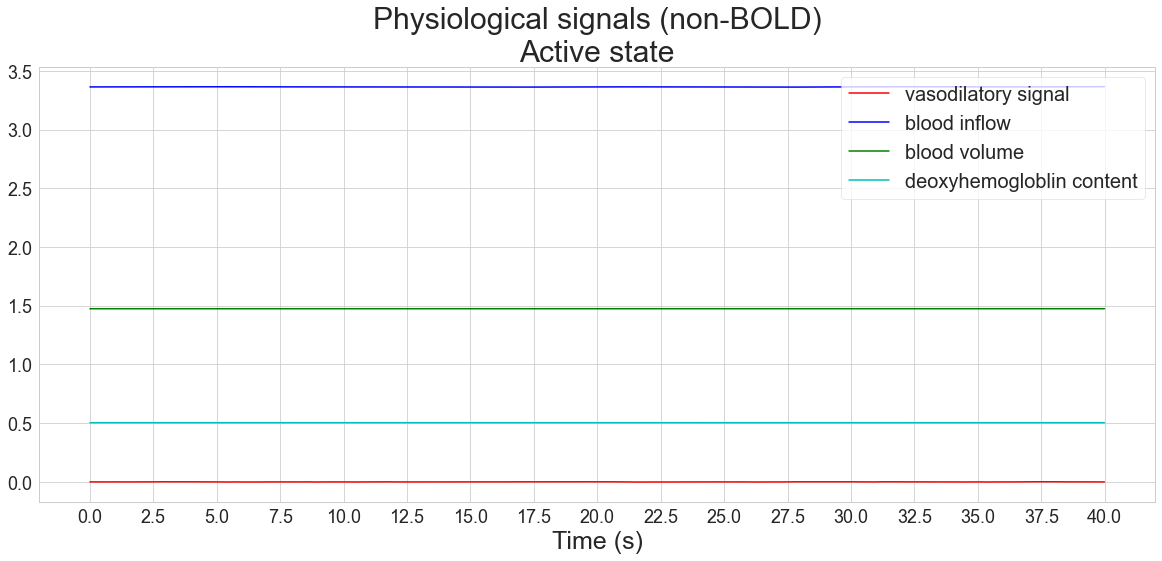

In [16]:
sampling_rate = 0.01
z = np.vstack((I1[0],I1[1],I1[2]))
BOLD, s, f, v, q  = bw.balloonWindkessel(z,sampling_rate=0.01)

plt.figure(figsize=(20,8))
plt.title('Physiological signals (non-BOLD)\nDe-active state', fontsize=30)
plt.plot(s[0,:],'r',label='vasodilatory signal')
plt.plot(f[0,:],'b',label='blood inflow')
plt.plot(v[0,:],'g',label='blood volume')
plt.plot(q[0,:],'c',label='deoxyhemogloblin content')
plt.xticks(np.arange(0,t,250),np.arange(0,t,250)*sampling_rate)
plt.xlabel('Time (s)', fontsize=25)
plt.legend(fontsize=20)

plt.figure(figsize=(20,8))
plt.title('Physiological signals (non-BOLD)\nIntrinsic state', fontsize=30)
plt.plot(s[1,:],'r',label='vasodilatory signal')
plt.plot(f[1,:],'b',label='blood inflow')
plt.plot(v[1,:],'g',label='blood volume')
plt.plot(q[1,:],'c',label='deoxyhemogloblin content')
plt.xticks(np.arange(0,t,250),np.arange(0,t,250)*sampling_rate)
plt.xlabel('Time (s)', fontsize=25)
plt.legend(fontsize=20)

plt.figure(figsize=(20,8))
plt.title('Physiological signals (non-BOLD)\nActive state', fontsize=30)
plt.plot(s[2,:],'r',label='vasodilatory signal')
plt.plot(f[2,:],'b',label='blood inflow')
plt.plot(v[2,:],'g',label='blood volume')
plt.plot(q[2,:],'c',label='deoxyhemogloblin content')
plt.xticks(np.arange(0,t,250),np.arange(0,t,250)*sampling_rate)
plt.xlabel('Time (s)', fontsize=25)
plt.legend(fontsize=20)